In [1]:
from shapely.geometry import shape,mapping
from shapely.geometry import Polygon
from shapely.wkt import dumps, loads
import folium
import json

In [2]:
#wkt格式
wkt_string="POLYGON ((0 0, 10 10, 10 0, 0 0))"

area 50.0 length 34.14213562373095
wkt POLYGON ((0 0, 10 10, 10 0, 0 0))


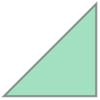

In [3]:
# shapely格式
# polygon = Polygon([(0, 0), (10, 10), (10, 0)])
polygon=loads(wkt_string)
print('area',polygon.area,'length',polygon.length)
print('wkt',polygon.wkt)
polygon

In [7]:
# 用Polygon图层显示
m=folium.Map(location=(5,5),zoom_start=6)

# Polygon图层
# folium.Polygon([
#     [0,0],
#     [10,0],
#     [3,3],
#     [0,5]
# ],fill_color='red').add_to(m)

xlst,ylst=polygon.exterior.xy
lst=[[y,x] for x,y in zip(xlst,ylst)]
folium.Polygon(lst,fill_color='red').add_to(m)
m

In [5]:
# geojson格式
json_poly=mapping(polygon)
print('shape json',json_poly,'\n')

geojson_dic={
        "type": "Feature",
        "geometry": mapping(polygon),
        }
geojson_poly=json.dumps(geojson_dic)
print('geojson_poly',geojson_poly)

shape json {'type': 'Polygon', 'coordinates': (((0.0, 0.0), (10.0, 10.0), (10.0, 0.0), (0.0, 0.0)),)} 

geojson_poly {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[0.0, 0.0], [10.0, 10.0], [10.0, 0.0], [0.0, 0.0]]]}}


In [6]:
# 用GeoJson格式显示

m=folium.Map(location=(5,5),zoom_start=6)

# GeoJson图层
folium.GeoJson(
    geojson_poly,
    name='geojson'
).add_to(m)

m